In [1]:
# Importar bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')
from sklearn.metrics import confusion_matrix

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Convolution2D, MaxPooling2D, Flatten, Activation
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

In [2]:
# Carregar os dados do MNIST (imagens de dígitos de 0 a 9)
(x_train, y_train), (x_test, y_test) = mnist.load_data()

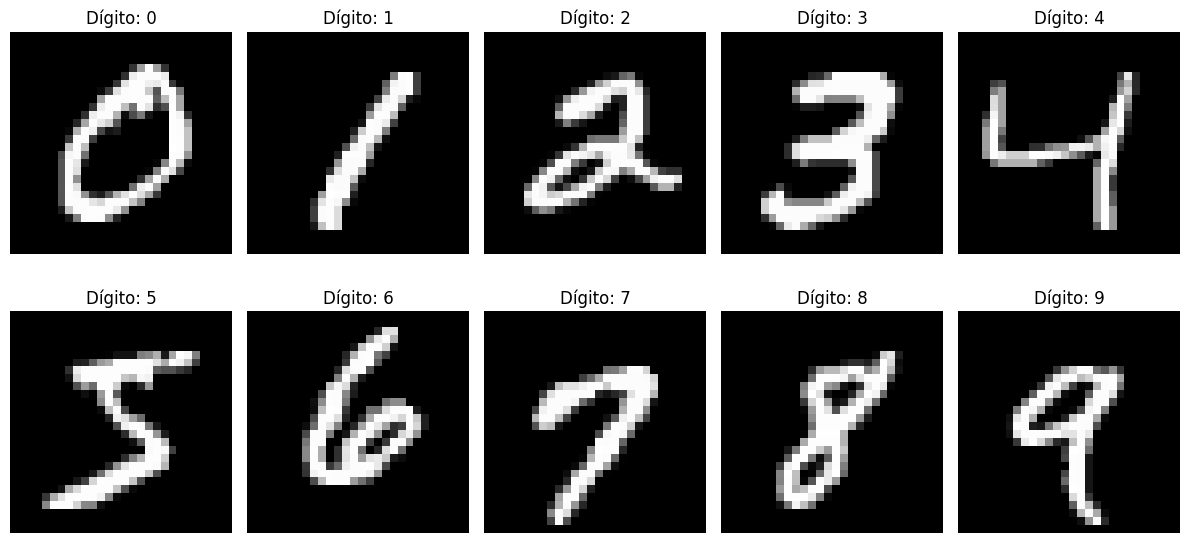

In [3]:
# Lista para armazenar os índices das primeiras ocorrências de cada dígito
indices = []

# Encontrar os índices das primeiras ocorrências dos dígitos de 0 a 9
for digit in range(10):
    idx = np.where(y_train == digit)[0][0]  # Obter o primeiro índice do dígito
    indices.append(idx)

# Exibir as 10 imagens correspondentes aos índices encontrados
plt.figure(figsize=(12, 6))
for i, idx in enumerate(indices):
    plt.subplot(2, 5, i + 1)  # Layout 2x5 para 10 imagens
    plt.imshow(x_train[idx], cmap="gray")  # Exibir a imagem do dígito
    plt.title(f"Dígito: {y_train[idx]}")  # Corrigir o título para o rótulo correto
    plt.axis("off")  # Remover os eixos

plt.tight_layout()  # Ajustar o layout para evitar sobreposição
plt.show()

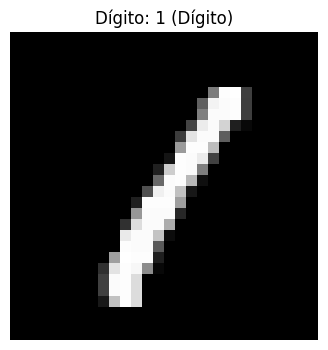

Valores dos pixels do dígito 0 (28x28):
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  124 253 255  63   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  96
  244 251 253  62   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 127
  251 251 253  62   0   0   0   0   0   0]
 [  0   0   0   0   0   

In [ ]:
idx_digit = indices[1]
digit_image = x_train[idx_digit]

# Exibir a imagem do dígito
plt.figure(figsize=(4, 4))
plt.imshow(digit_image, cmap="gray")
plt.title(f"Dígito: {y_train[idx_digit]} (Dígito)")
plt.axis("off")  # Remover os eixos
plt.show()

# Imprimir os valores numéricos dos pixels
print("Valores dos pixels do dígito (28x28):")
print(digit_image)

In [8]:
# Dividir os dados de treino em treino e validação
X_train = x_train[0:50000] / 255.0  # Normalizar os dados para o intervalo [0, 1]
Y_train = to_categorical(y_train[0:50000], 10)  # One-hot encoding para os rótulos

X_val = x_train[50000:60000] / 255.0  # Dados de validação
Y_val = to_categorical(y_train[50000:60000], 10)

X_test = x_test / 255.0  # Normalizar os dados de teste
Y_test = to_categorical(y_test, 10)

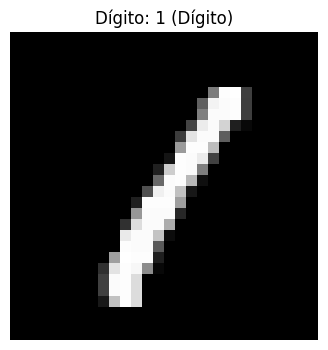

Valores dos pixels do dígito (28x28):
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.    

In [9]:
idx_digit = indices[1]
digit_image = X_train[idx_digit]

# Exibir a imagem do dígito
plt.figure(figsize=(4, 4))
plt.imshow(digit_image, cmap="gray")
plt.title(f"Dígito: {y_train[idx_digit]} (Dígito)")
plt.axis("off")  # Remover os eixos
plt.show()

# Imprimir os valores numéricos dos pixels
print("Valores dos pixels do dígito (28x28):")
print(digit_image)

In [10]:
# Ajustar os dados para o formato esperado pelos modelos CNN (matrizes 4D)
X_train = np.reshape(X_train, (X_train.shape[0], 28, 28, 1))
X_val = np.reshape(X_val, (X_val.shape[0], 28, 28, 1))
X_test = np.reshape(X_test, (X_test.shape[0], 28, 28, 1))

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(50000, 28, 28, 1)
(10000, 28, 28, 1)
(10000, 28, 28, 1)


In [5]:
# Função para embaralhar os pixels da imagem
def shuffel_pixels(idx, data):
    data_new = np.zeros(data.shape)
    for i, img in enumerate(data):
        data_new[i] = img.flatten()[idx].reshape((28, 28, 1))
    return data_new

In [6]:
# Função para plotar gráficos de acurácia e loss
def plot_metrics(history, title_suffix=""):
    plt.figure(figsize=(12, 5))
    
    # Plotar acurácia
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Treinamento')
    plt.plot(history.history['val_accuracy'], label='Validação')
    plt.title(f"Acurácia x Épocas {title_suffix}")
    plt.xlabel("Épocas")
    plt.ylabel("Acurácia")
    plt.legend()
    
    # Plotar perda (loss)
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Treinamento')
    plt.plot(history.history['val_loss'], label='Validação')
    plt.title(f"Loss x Épocas {title_suffix}")
    plt.xlabel("Épocas")
    plt.ylabel("Loss")
    plt.legend()
    
    plt.tight_layout()
    plt.show()

In [7]:
# Função para imprimir a matriz de confusão
def print_confusion_matrix(y_true, y_pred, title="Matriz de Confusão"):
    conf_matrix = confusion_matrix(y_true, y_pred)
    print(title)
    print(conf_matrix)

In [8]:
# Gerar índices embaralhados para embaralhar os pixels
np.random.seed(42)
shuffel_idx = np.random.permutation(np.arange(28 * 28))

In [9]:
# Embaralhar os dados de treino, validação e teste
X_train_shuffle = shuffel_pixels(shuffel_idx, X_train)
X_val_shuffle = shuffel_pixels(shuffel_idx, X_val)
X_test_shuffle = shuffel_pixels(shuffel_idx, X_test)

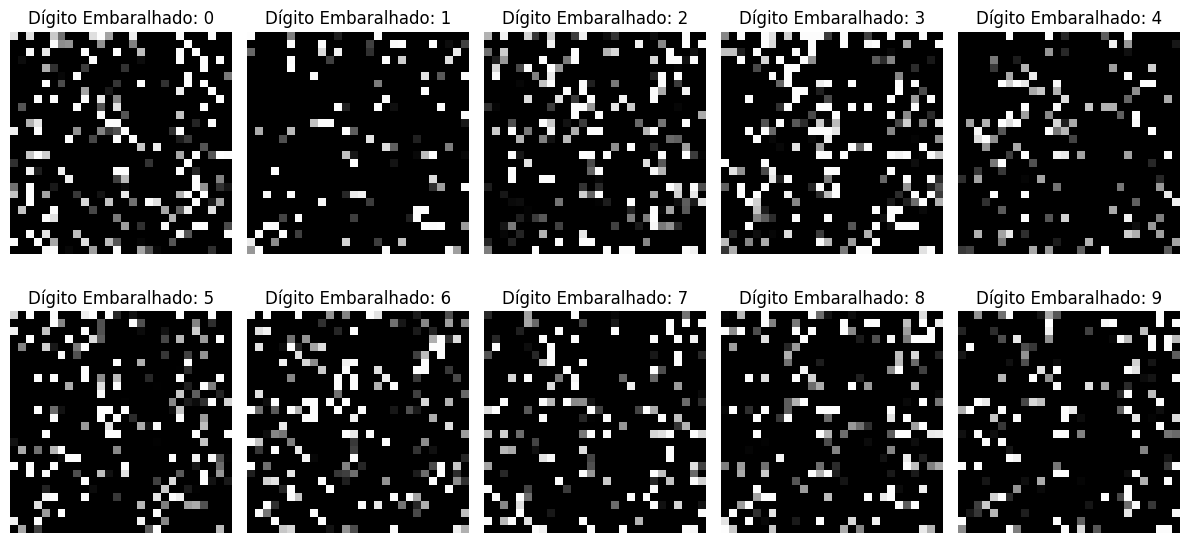

In [10]:
# Lista para armazenar os índices das primeiras ocorrências de cada dígito
indices = []

# Encontrar os índices das primeiras ocorrências dos dígitos de 0 a 9
for digit in range(10):
    idx = np.where(y_train == digit)[0][0]  # Obter o primeiro índice do dígito
    indices.append(idx)

# Exibir as 10 imagens embaralhadas correspondentes aos índices encontrados
plt.figure(figsize=(12, 6))
for i, idx in enumerate(indices):
    plt.subplot(2, 5, i + 1)  # Layout 2x5 para 10 imagens
    plt.imshow(X_train_shuffle[idx].reshape(28, 28), cmap="gray")  # Mostrar a imagem embaralhada
    plt.title(f"Dígito Embaralhado: {y_train[idx]}")  # Título com o rótulo original
    plt.axis("off")  # Remover os eixos

plt.tight_layout()  # Ajustar o layout para evitar sobreposição
plt.show()

In [11]:
# Ajustar os dados para o formato vetorial necessário para as fcNNs (fully connected neural networks)
X_train_flat = X_train.reshape([X_train.shape[0], 784])
X_val_flat = X_val.reshape([X_val.shape[0], 784])
X_test_flat = X_test.reshape([X_test.shape[0], 784])

In [12]:
# Ajustar os dados embaralhados para o formato vetorial
X_train_shuffle_flat = X_train_shuffle.reshape([X_train_shuffle.shape[0], 784])
X_val_shuffle_flat = X_val_shuffle.reshape([X_val_shuffle.shape[0], 784])
X_test_shuffle_flat = X_test_shuffle.reshape([X_test_shuffle.shape[0], 784])

In [ ]:
# Definir uma rede neural totalmente conectada (fcNN) com 2 camadas ocultas
model = Sequential()
model.add(Dense(100, input_shape=(784,)))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('softmax'))

In [12]:
# Compilar o modelo
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
# Treinar a fcNN nos dados originais
history = model.fit(X_train_flat, Y_train, 
                    batch_size=128, 
                    epochs=10,
                    verbose=2, 
                    validation_data=(X_val_flat, Y_val))

Estrutura da Matriz de Confusão
Linhas: Representam as classes reais (rótulos verdadeiros) dos dígitos.
Colunas: Representam as classes preditas (saídas do modelo).

In [ ]:
# Plotar métricas e imprimir matriz de confusão (dados originais)
plot_metrics(history, title_suffix="(Dados Originais - fcNN)")
pred = model.predict(X_test_flat)
y_pred = np.argmax(pred, axis=1)
y_true = np.argmax(Y_test, axis=1)
print_confusion_matrix(y_true, y_pred, title="Matriz de Confusão - fcNN (Dados Originais)")

In [ ]:
# Avaliar o modelo nos dados de teste originais
pred = model.predict(X_test_flat)
acc_fc_orig = np.sum(np.argmax(Y_test, axis=1) == np.argmax(pred, axis=1)) / len(pred)
print("Acurácia com dados originais (fcNN):", acc_fc_orig)

In [ ]:
# Definir uma rede neural totalmente conectada (fcNN) com 2 camadas ocultas
model = Sequential()
model.add(Dense(100, input_shape=(784,)))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('softmax'))

In [17]:
# Compilar o modelo
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
history = model.fit(X_train_shuffle_flat, Y_train, 
                    batch_size=128, 
                    epochs=10,
                    verbose=2, 
                    validation_data=(X_val_shuffle_flat, Y_val))

In [ ]:
# Plotar métricas e imprimir matriz de confusão (dados embaralhados)
plot_metrics(history, title_suffix="(Dados Embaralhados - fcNN)")
pred = model.predict(X_test_shuffle_flat)
y_pred = np.argmax(pred, axis=1)
y_true = np.argmax(Y_test, axis=1)
print_confusion_matrix(y_true, y_pred, title="Matriz de Confusão - fcNN (Dados Embaralhados)")

In [ ]:
# Avaliar o modelo nos dados de teste embaralhados
pred = model.predict(X_test_shuffle_flat)
acc_fc_shuffle = np.sum(np.argmax(Y_test, axis=1) == np.argmax(pred, axis=1)) / len(pred)
print("Acurácia com dados embaralhados (fcNN):", acc_fc_shuffle)

In [ ]:
# Definir uma CNN para trabalhar com dados organizados espacialmente
model = Sequential()
model.add(Convolution2D(8, (3, 3), padding='same', input_shape=(28, 28, 1)))
model.add(Activation('relu'))
model.add(Convolution2D(8, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(16, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Convolution2D(16, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(40))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

In [22]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
# Treinar a CNN nos dados originais
history = model.fit(X_train, Y_train, 
                    batch_size=128, 
                    epochs=10,
                    verbose=2, 
                    validation_data=(X_val, Y_val))

In [ ]:
# Plotar métricas e imprimir matriz de confusão (dados originais)
plot_metrics(history, title_suffix="(Dados Originais - CNN)")
pred = model.predict(X_test)
y_pred = np.argmax(pred, axis=1)
y_true = np.argmax(Y_test, axis=1)
print_confusion_matrix(y_true, y_pred, title="Matriz de Confusão - CNN (Dados Originais)")

In [ ]:
# Avaliar a CNN nos dados originais
pred = model.predict(X_test)
acc_cnn = np.sum(np.argmax(Y_test, axis=1) == np.argmax(pred, axis=1)) / len(pred)
print("Acurácia com CNN (dados originais):", acc_cnn)

In [ ]:
# Treinar a CNN nos dados embaralhados
history = model.fit(X_train_shuffle, Y_train, 
                    batch_size=128, 
                    epochs=10,
                    verbose=2, 
                    validation_data=(X_val_shuffle, Y_val))

In [ ]:
# Plotar métricas e imprimir matriz de confusão (dados embaralhados)
plot_metrics(history, title_suffix="(Dados Embaralhados - CNN)")
pred = model.predict(X_test_shuffle)
y_pred = np.argmax(pred, axis=1)
y_true = np.argmax(Y_test, axis=1)
print_confusion_matrix(y_true, y_pred, title="Matriz de Confusão - CNN (Dados Embaralhados)")

In [ ]:
# Avaliar a CNN nos dados embaralhados
pred = model.predict(X_test_shuffle)
acc_cnn_shuffle = np.sum(np.argmax(Y_test, axis=1) == np.argmax(pred, axis=1)) / len(pred)
print("Acurácia com CNN (dados embaralhados):", acc_cnn_shuffle)